In [31]:
def single_linear_regression(dataframe, dependent_variable, independent_variable):
    import pandas as pd
    import math
    import statistics as sd

    n = len(df)
    
    #calculating the means
    dep_mean = dataframe[dependent_variable].sum()
    print(dep_mean)
    ind_mean = dataframe[independent_variable].mean()
    
    #calcuate the sd
    dep_sd = sd.stdev(dataframe[dependent_variable])
    
    #calculate correlation coeff
    sum_dep = dataframe[dependent_variable].sum()
    sum_ind = dataframe[independent_variable].sum()
    
    dep_square_df = (dataframe[independent_variable]**2).sum()
    ind_square_df = (dataframe[dependent_variable]**2).sum()

    sum_depind = (dataframe[dependent_variable]*dataframe[independent_variable]).sum()
    r_num = n*sum_depind - sum_dep*sum_ind
    r_denom = (n*dep_square_df - (dataframe['x'].sum())**2)*(n*ind_square_df - (dataframe['y'].sum())**2)
    r = r_num/math.sqrt(r_denom)
    
    #creating the ANOVA table
    TSS = (n-1)*(dep_sd**2)
    
    sum_squares_reg = r**2 * TSS
    mean_square_reg = r**2 * TSS
    F_dist = ((n-2)*r**2)/(1-r**2)
    
    sum_squares_error = (1-r**2) * TSS
    mean_square_error = ((1-r**2) * TSS)/(n-2) 
    sum_square_output = []
    
    ANOVA = pd.DataFrame({"Source":["Regression", "Error", "Total"],
                          "df": [1, n-2, n-1], 
                          "Sum of Squares":[sum_squares_reg, TSS-sum_squares_reg, TSS],
                         "Mean Square":[mean_square_reg,(TSS-sum_squares_reg)/2, ""],
                         "F":[F_dist,"",""]}).set_index("Source")
    return ANOVA

single_linear_regression(df,'y',"x")

4202719.00030353


,df,Sum of Squares,Mean Square,F
Source,,,,
Regression,1,6.724243e+09,6724243156.365673,387.346518
Error,442,7.673015e+09,3836507287.593774,
Total,443,1.439726e+10,,


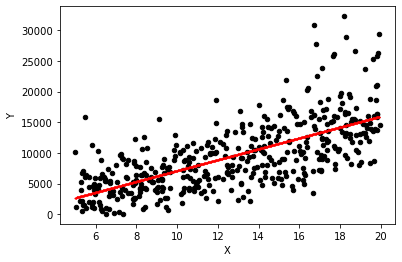

Regression Equation: y=-1767.941 + 887.152*X


In [42]:
def regression_graph(dataframe, dependent_variable, independent_variable):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import math
    
    n = len(df)
    sum_dep = dataframe[dependent_variable].sum()
    sum_ind = dataframe[independent_variable].sum()
    
    dep_square_df = (dataframe[independent_variable]**2).sum()
    ind_square_df = (dataframe[dependent_variable]**2).sum()

    sum_depind = (dataframe[dependent_variable]*dataframe[independent_variable]).sum()
    r_num = n*sum_depind - sum_dep*sum_ind
    r_denom = (n*dep_square_df - (dataframe['x'].sum())**2)*(n*ind_square_df - (dataframe['y'].sum())**2)
    r = r_num/math.sqrt(r_denom)
    
    
    #determining where the linear regression line should start and stop, based off the data
    start = min(dataframe[independent_variable])
    end = max(dataframe[independent_variable])
    
    #The regression equation
    B1 = dataframe[dependent_variable].std()/ dataframe[independent_variable].std()*r
    Bo = dataframe[dependent_variable].mean() - dataframe[independent_variable].mean() * B1
    pred_values = []
    
    #The values in which the regression equation is based off of and than creating the nested lists into a dataframe
    while start <= end:
        pred_values.append([start, Bo + B1 * start])
        start += .01
    predicted_values = pd.DataFrame(pred_values, columns = ['x', 'predicted y'])
    
    #making the graphs and displaying them
    ax = dataframe.plot.scatter(independent_variable, dependent_variable, color = 'k')
    predicted_values.plot.scatter('x', 'predicted y', color = 'r', ax=ax, s=0.5)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    
    plt.show()
    print(f"Regression Equation: y={round(Bo,3)} + {round(B1,3)}*X")
    
regression_graph(df,'y','x')